<a href="https://colab.research.google.com/github/abdulom4/Astronomy/blob/main/Income_vs_Education_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# https://nces.ed.gov/programs/coe/indicator/cba/annual-earnings used for data

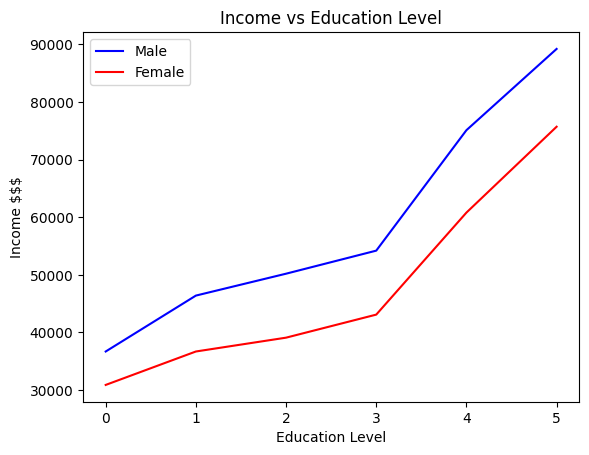

In [21]:
Income_arr = np.array([36700,46400,50200,54200,75100,89200]) # array for the income of males
Income_arr2 = np.array([30900,36700,39100,43100,60800,75700]) # array for the income of females
Education_arr = np.arange(len(Income_arr)) # array for the education level
plt.plot(Income_arr, color="blue", label="Male") # plots the income of males
plt.plot(Income_arr2, color="red", label="Female") # plots the income of females
plt.legend(loc="upper left") # shows the legend
plt.xlabel('Education Level') # shows the x axis label
plt.ylabel('Income $$$') # shows the y axis label
plt.title('Income vs Education Level') # shows the title
plt.show() # shows the plot

In [22]:
Education_levels = np.array([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate’s degree",
"Bachelor’s degree",
"Master’s or higher degree"
])
# array for the education level

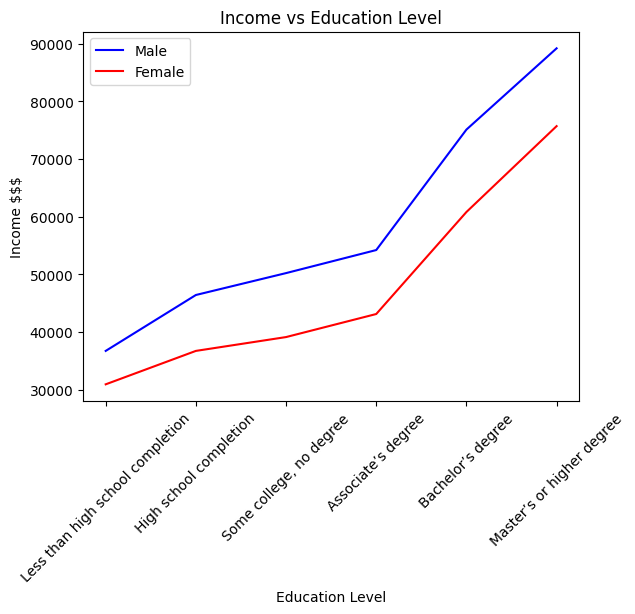

In [23]:
plt.plot(Income_arr, color="blue", label="Male") # plots the income of males
plt.plot(Income_arr2, color="red", label="Female") # plots the income of females
plt.legend(loc="upper left") # shows the legend
plt.xlabel('Education Level') # shows the x axis label
plt.ylabel('Income $$$') # shows the y axis label
plt.title('Income vs Education Level') # shows the title
plt.xticks(np.arange(6), Education_levels, rotation=45) # shows the education levels on the x axis at a 45 degree angle
plt.show() # shows the plot

In [24]:
z_linear = np.polyfit(Education_arr, Income_arr, 1) # plots points using a linear polyfit of the the income and education arr for males
z_linear2 = np.polyfit(Education_arr, Income_arr2, 1) # plots points using a linear polyfit of the income and education arr for females
print(z_linear) # prints the points for males
print(z_linear2) # prints the points for females
print("Slope = ", z_linear[0], " in dollar per level") # shows the slope and y-intercept for males
print("Y-intercept = ", z_linear[1], " in dollar at level 0, i.e., Less than high school completion") # shows the slope and y-intercept for males
print("Slope = ", z_linear2[0], " in dollar per level") # shows the slope and y-intercept for females
print("Y-intercept = ", z_linear2[1], " in dollar at level 0, i.e., Less than high school completion") # shows the slope and y-intercept for females

[10074.28571429 33447.61904762]
[ 8580.         26266.66666667]
Slope =  10074.285714285712  in dollar per level
Y-intercept =  33447.61904761905  in dollar at level 0, i.e., Less than high school completion
Slope =  8579.999999999998  in dollar per level
Y-intercept =  26266.666666666653  in dollar at level 0, i.e., Less than high school completion


In [25]:
z_quadratic = np.polyfit(Education_arr,Income_arr,2) # plots points using a quadratic polyfit of the the income and education arr for males
z_quadratic2 = np.polyfit(Education_arr,Income_arr2,2) # plots points using a quadratic polyfit of the the income and education arr for females
print(z_quadratic) # prints the points for males
print(z_quadratic2) # prints the points for females
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic[0], z_quadratic[1], z_quadratic[2]))
# the line above shows the quadratic equation for males
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic2[0], z_quadratic2[1], z_quadratic2[2]))
# the line above shows the quadratic equation for females


[ 1614.28571429  2002.85714286 38828.57142857]
[ 1905.35714286  -946.78571429 32617.85714286]
That is: Income = 1614.3 * level**2 + 2002.9 * level + 38828.6
That is: Income = 1905.4 * level**2 + -946.8 * level + 32617.9


**Which fits better?**

χ^2 = Σ$\frac{(O_i - σ_i)^2}{σ_i^2}$

Based off of  https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic
we know that $χ_v^2$ = $\frac{χ^2}{v}$  Generally $χ_v^2$ is closer to 1.

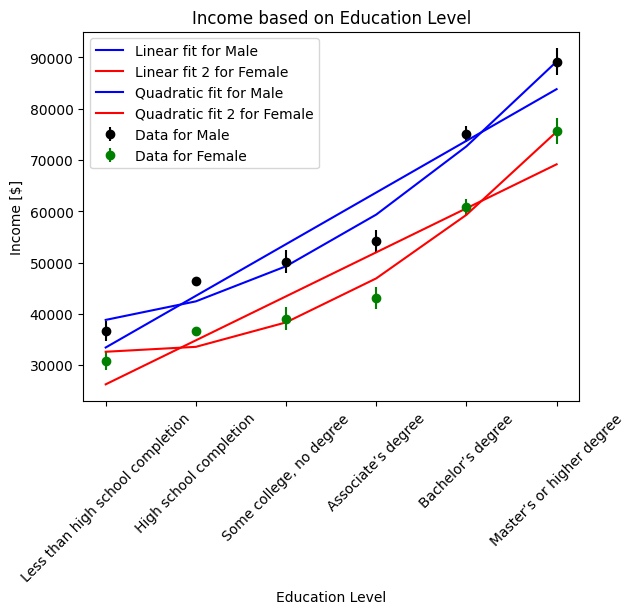

In [29]:
# Plot the data and the two fits: linear and quadratic
# Rename some variables to be consistent with the above definition
O = Income_arr  # extract from the same figure with Confidence interval toggled on
O2 = Income_arr2 # extract from the same figure with Confidence interval toggled on
O_err = np.array([1910, 500, 2220, 2140, 1540, 2580]) # extract from the same figure with Confidence interval toggled on, and remove the first entry
O2_err = np.array([1910, 500, 2220, 2140, 1540, 2580]) # extract from the same figure with Confidence interval toggled on, and remove the first entry

C_linear = z_linear[0] * Education_arr + z_linear[1] # plots the linear fit for Males
C_linear2 = z_linear2[0] * Education_arr + z_linear2[1] # plots the linear fit for Females
C_quadratic = z_quadratic[0] * Education_arr**2 + z_quadratic[1] * Education_arr + z_quadratic[2] # plots the quadratic fit for Males
C_quadratic2 = z_quadratic2[0] * Education_arr**2 + z_quadratic2[1] * Education_arr + z_quadratic2[2] # plots the quadratic fit for Females

Income_arr = np.array([36700.,46400.,50200.,54200.,75100.,89200.]) # array of income for Males
Income_arr2 = np.array([30900.,36700.,39100.,43100.,60800.,75700.]) # array of income for Females
Education_arr = np.arange(len(Income_arr))
plt.errorbar(Education_arr, O, yerr=O_err, marker="o", linestyle = "None", color = "black", label = "Data for Male") # plots the data for males
plt.errorbar(Education_arr, O2, yerr=O2_err, marker="o", linestyle = "None", color = "green", label = "Data for Female") # plots the data for females
plt.plot(Education_arr,C_linear, color = "blue", label = "Linear fit for Male") # plots the linear fit
plt.plot(Education_arr,C_linear2, color = "red", label = "Linear fit 2 for Female") # plots the linear fit
plt.plot(Education_arr,C_quadratic, color = "blue", label = "Quadratic fit for Male") # plots the quadratic fit
plt.plot(Education_arr,C_quadratic2, color = "red", label = "Quadratic fit 2 for Female") # plots the quadratic fit
plt.legend() # shows the legend
plt.xlabel("Education Level") # shows the x axis label
plt.ylabel("Income [$]") # shows the y axis label
plt.title("Income based on Education Level") # shows the title
plt.xticks(np.arange(6), Education_levels, rotation=45) # shows the education levels on the x axis at a 45 degree angle
plt.show() # shows the plot